In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import librosa
import keras
from keras.utils import np_utils
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train_folder = "/content/train"

annotations = pd.read_csv("/content/annotations.csv")

In [3]:
annotations.head()

Unnamed: 0       fname label  split
0           0   02639.npy  Bark  train
1           1    1580.npy  Bark  train
2           2   24030.npy  Bark  train
3           3  316499.npy  Bark  train
4           4  413718.npy  Bark  train

In [4]:
annotations.drop(labels=['Unnamed: 0'], axis = 1, inplace=True)

In [5]:
annotations['label'].value_counts()

Bark                                     100
Meow                                     100
Siren                                    100
Shatter                                  100
Knock                                    100
Crying_and_sobbing                       100
Microwave_oven                           100
Vehicle_horn_and_car_horn_and_honking    100
Doorbell                                 100
Walk_and_footsteps                       100
Name: label, dtype: int64

In [6]:
labels = np.unique(annotations['label'])
print(labels)

['Bark' 'Crying_and_sobbing' 'Doorbell' 'Knock' 'Meow' 'Microwave_oven'
 'Shatter' 'Siren' 'Vehicle_horn_and_car_horn_and_honking'
 'Walk_and_footsteps']


In [65]:
n_fft = 2048
hop_length = 512
win_length = 1024  
n_mfcc = 64         
f_len = 4
Fs = 16000
sr = 16000

# Data Preprocessing

In [66]:
def one_hot_encoding(label, num_labels):
  x = np.zeros(num_labels)
  x[label] = 1
  return x  

In [67]:
X = []
Y = []

for i in range(len(annotations['fname'])):
    label = annotations['label'].iloc[i]
    label_idx = list(labels).index(label)
    label_one_hot = one_hot_encoding(label_idx, len(labels))
    filename = annotations['fname'].iloc[i]
    f = os.path.join(train_folder, filename)
    if os.path.isfile(f):
        x = np.load(f).squeeze()
        for j in range(0, x.shape[1] - f_len, f_len):
          mfcc = librosa.feature.mfcc(S = x[:][j:j + f_len].T, sr = Fs, n_mfcc = n_mfcc)
          if (len(mfcc[0])*(len(mfcc)) == n_mfcc*f_len):
            X.append(mfcc)
            Y.append(label_one_hot)

X = np.array(X)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(28342, 64, 4)
(28342, 10)


# **Model Training**

In [68]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, shuffle=True, random_state=0)

In [69]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(64*4,), input_shape=(64, 4)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [70]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_data=(X_val,Y_val))

Epoch 1/40
753/753 [==============================] - 4s 5ms/step - loss: 1.4881 - accuracy: 0.5322 - val_loss: 1.1096 - val_accuracy: 0.6625
Epoch 2/40
753/753 [==============================] - 3s 4ms/step - loss: 0.8907 - accuracy: 0.7262 - val_loss: 0.8025 - val_accuracy: 0.7672
Epoch 3/40
753/753 [==============================] - 4s 5ms/step - loss: 0.6313 - accuracy: 0.8081 - val_loss: 0.6446 - val_accuracy: 0.8039
Epoch 4/40
753/753 [==============================] - 3s 4ms/step - loss: 0.5273 - accuracy: 0.8411 - val_loss: 0.8472 - val_accuracy: 0.7667
Epoch 5/40
753/753 [==============================] - 3s 4ms/step - loss: 0.4609 - accuracy: 0.8616 - val_loss: 0.5489 - val_accuracy: 0.8434
Epoch 6/40
753/753 [==============================] - 6s 7ms/step - loss: 0.3451 - accuracy: 0.8951 - val_loss: 0.5562 - val_accuracy: 0.8582
Epoch 7/40
753/753 [==============================] - 5s 6ms/step - loss: 0.3354 - accuracy: 0.9006 - val_loss: 0.4860 - val_accuracy: 0.8739
Epoch 

# **Plot of train and validation accuracy**

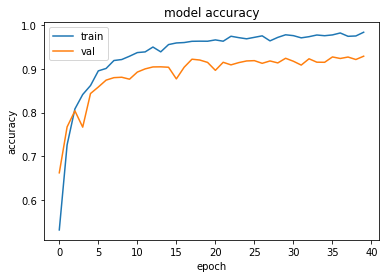

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Test data checking


In [73]:
test_dir = "/content/test/"
files = os.listdir(test_dir)
print(files)

['MLSP_test1301172.npy', 'MLSP_test113179.npy', 'MLSP_test1865154.npy', 'MLSP_test896150.npy', 'MLSP_test485355.npy', 'MLSP_test688497.npy', 'MLSP_test130845.npy', 'MLSP_test489164.npy', 'MLSP_test1553343.npy', 'MLSP_test286435.npy', 'MLSP_test997159.npy', 'MLSP_test2679170.npy', 'MLSP_test684486.npy', 'MLSP_test77893.npy', 'MLSP_test2559120.npy', 'MLSP_test1443477.npy', 'MLSP_test8403.npy', 'MLSP_test210764.npy', 'MLSP_test1968494.npy', 'MLSP_test572384.npy', 'MLSP_test68915.npy', 'MLSP_test149028.npy', 'MLSP_test2158293.npy', 'MLSP_test2462130.npy', 'MLSP_test58686.npy', 'MLSP_test2823431.npy', 'MLSP_test303269.npy', 'MLSP_test968297.npy', 'MLSP_test2073257.npy', 'MLSP_test1116162.npy', 'MLSP_test2647496.npy', 'MLSP_test6416.npy', 'MLSP_test683408.npy', 'MLSP_test632353.npy', 'MLSP_test1077269.npy', 'MLSP_test206085.npy', 'MLSP_test2109311.npy', 'MLSP_test574217.npy', 'MLSP_test1163322.npy', 'MLSP_test3739.npy', 'MLSP_test2471429.npy', 'MLSP_test1404304.npy', 'MLSP_test620253.npy', '

In [74]:
result = {
    "fileid": [],
    "prediction": []
}
for fileid in files:
  X = []
  f = test_dir + fileid
  if os.path.isfile(f):
    x = np.load(f).squeeze()
    for j in range(0, x.shape[0] - f_len, f_len):
      mfcc = librosa.feature.mfcc(S = x[j:j + f_len].T, sr = Fs, n_mfcc = n_mfcc)
      if (len(mfcc[0])*(len(mfcc)) == n_mfcc*f_len):
        X.append(mfcc)
    X = np.array(X)
    if len(X)!=0:
      prediction = model.predict(X)
      label = labels[np.bincount(np.argmax(prediction, axis = 1)).argmax()]
    else:
      label = labels[0]
    result["fileid"].append(fileid)
    result["prediction"].append(label)

In [75]:
df = pd.DataFrame(result)
df.to_csv("/content/result.csv")